In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST con rete multistrato

Iniziamo presentando di nuovo la rete multistrato per il riconoscimento delle immagini di MNIST presentata nella Lezione 2 - parte 1.

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

x_train = train_images / 255.0
x_test = test_images / 255.0

y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
network = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = network.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 5s 4ms/step - loss: 0.2577 - accuracy: 0.9246
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1045 - accuracy: 0.9689
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9796
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9883
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9937
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.9949
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0134 - accuracy: 0.9961
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0106 - accuracy: 0.9966

In [5]:
network.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0869 - accuracy: 0.9832


[0.08686134964227676, 0.9832000136375427]

In [6]:
# Determiniamo quali sono le immagini dove la nostra rete sbaglia (per l'insieme di test).

predictions_test = network.predict(x_test)
np.where([ np.argmax(x) for x in predictions_test] != test_labels)

(array([  18,  115,  149,  247,  321,  340,  445,  449,  495,  582,  659,
         684,  691,  720,  726,  846,  900,  947,  951, 1014, 1039, 1112,
        1156, 1226, 1232, 1242, 1247, 1319, 1328, 1393, 1395, 1494, 1496,
        1500, 1522, 1530, 1549, 1553, 1609, 1621, 1681, 1717, 1790, 1800,
        1850, 1901, 1941, 1984, 2004, 2043, 2053, 2070, 2098, 2109, 2118,
        2130, 2135, 2224, 2293, 2369, 2387, 2406, 2414, 2462, 2488, 2597,
        2607, 2654, 2877, 2915, 2921, 2939, 2953, 3060, 3073, 3117, 3172,
        3225, 3289, 3422, 3441, 3503, 3520, 3558, 3559, 3567, 3751, 3780,
        3796, 3808, 3818, 3838, 3853, 3893, 3906, 3926, 3941, 3943, 4027,
        4065, 4078, 4176, 4199, 4248, 4289, 4294, 4360, 4443, 4497, 4536,
        4639, 4740, 4807, 4814, 4823, 4860, 4880, 4956, 5331, 5457, 5642,
        5676, 5734, 5887, 5936, 5937, 5955, 5972, 5973, 5982, 6011, 6023,
        6046, 6059, 6555, 6571, 6574, 6576, 6597, 6651, 6755, 6783, 6847,
        7216, 7545, 7800, 8094, 8246, 

Predizione:  9
Valore effettivo:  2


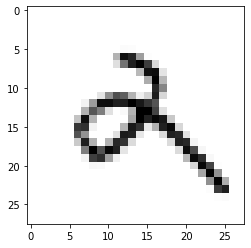

In [8]:
# Controlliamo ad esempio l'immagine 149

print("Predizione: ", np.argmax(predictions_test[149]))
print("Valore effettivo: ", test_labels[149])

plt.imshow(x_test[149], cmap= plt.cm.binary)

# MNIST con rete convoluzionale

In [9]:
# Shape attuale di x_train

x_train.shape

(60000, 28, 28)

In [10]:
# Cambiamo lo shape delle immagini aggiungendo una dimensione in più. I dati
# sono sempre gli stessi, solo che adesso li vediamo com un array a 4 dimensioni
# dove l'ultima dimensione (il numero di filtri) è lunga 1.

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [13]:
# Costruiamo na rete convoluzionale.

network2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [14]:
# Addestriamola.

network2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network2.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 14s 13ms/step - loss: 0.2190 - accuracy: 0.9315
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0345 - accuracy: 0.9896
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0210 - accuracy: 0.9936
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0164 - accuracy: 0.9950
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0135 - accuracy: 0.9958
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0104 - accuracy: 0.9968
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0073 - accur

In [15]:
# Valutiamo sull'insieme di test. Vediamo che, nonostante sull'insieme di addestramento
# la nostra rete convoluzionale ha una accuratezza leggermente inferiore rispetto a
# quella fully-connected, sull'insieme di test la situazione si ribalta, perché la nuova
# rete ha meno overfitting.

network2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0284 - accuracy: 0.9929


[0.028406240046024323, 0.992900013923645]

In [16]:
# Determiniamo quali sono le immagini dove la nostra rete sbaglia (nell'insieme di test).

prediction_test = network2.predict(x_test)
np.where([ np.argmax(x) for x in prediction_test] != test_labels)

(array([ 340,  445,  449,  460,  582,  646,  659,  674,  846,  947, 1014,
        1039, 1226, 1242, 1247, 1260, 1319, 1328, 1522, 1709, 1737, 1828,
        1878, 1901, 2035, 2043, 2070, 2130, 2135, 2447, 2597, 2654, 2771,
        2896, 2921, 2939, 2953, 2995, 3225, 3422, 3520, 3762, 3806, 3808,
        3853, 3859, 3941, 4078, 4163, 4176, 4571, 4723, 4740, 4838, 5140,
        5634, 5654, 5752, 5937, 5982, 5997, 6571, 6576, 6597, 6625, 6651,
        8316, 9009, 9634, 9642, 9729]),)

Predizione:  3
Valore effettivo:  5


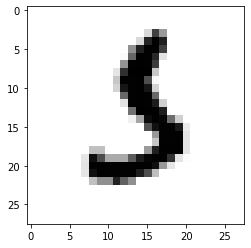

In [17]:
# Controlliamo ad esempio l'immagine 340.

print("Predizione: ", np.argmax(prediction_test[340]))
print("Valore effettivo: ", test_labels[340])

plt.imshow(test_images[340], cmap= plt.cm.binary)

# Esercizio per casa

Utilizzare reti ricorrenti per il riconoscimento delle immagini di CIFAR-10. Dovreste riuscire senza troppa difficoltà ad ottenere una accuratezza del 70% sull'insieme di test.